<a href="https://colab.research.google.com/github/Flonie1233/Activity-Learn-Bootsrap-5-/blob/main/ETL_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import random
from faker import Faker

fake = Faker()

# Generate dim_patients table
def generate_dim_patients(n):
    data = []
    for i in range(1, n + 1):
        data.append({
            "patient_id": i,
            "name": fake.name(),
            "dob": fake.date_of_birth(minimum_age=0, maximum_age=100),
            "gender": random.choice(["Male", "Female"]),
            "address": fake.street_address(),
            "contact_info": fake.phone_number(),
            "insurance_info": fake.company() + " " + fake.bothify(text='##-####')
        })
    return pd.DataFrame(data)

# Generate dim_encounters table
def generate_dim_encounters(n, num_patients):
    departments = ["Cardiology", "Orthopedics", "Neurology", "Pediatrics"]
    data = []
    for i in range(1, n + 1):
        admission_date = fake.date_this_year()
        discharge_date = admission_date + pd.Timedelta(days=random.randint(1, 10))
        data.append({
            "encounter_id": i,
            "patient_id": random.randint(1, num_patients),
            "admission_date": admission_date,
            "discharge_date": discharge_date,
            "department": random.choice(departments),
            "primary_diagnosis": fake.text(max_nb_chars=20),
            "secondary_diagnoses": fake.text(max_nb_chars=50),
            "procedures_performed": fake.text(max_nb_chars=100)
        })
    return pd.DataFrame(data)

# Generate dim_clinical_data table
def generate_dim_clinical_data(n, num_patients):
    data = []
    for i in range(1, n + 1):
        data.append({
            "clinical_data_id": i,
            "patient_id": random.randint(1, num_patients),
            "medical_history": fake.text(max_nb_chars=100),
            "current_medications": fake.text(max_nb_chars=50),
            "lab_results": fake.text(max_nb_chars=100),
            "imaging_reports": fake.text(max_nb_chars=100),
            "vital_signs": fake.text(max_nb_chars=50)
        })
    return pd.DataFrame(data)

# Generate dim_treatments table
def generate_dim_treatments(n, num_encounters):
    data = []
    for i in range(1, n + 1):
        data.append({
            "treatment_id": i,
            "encounter_id": random.randint(1, num_encounters),
            "treatment_plans": fake.text(max_nb_chars=100),
            "surgical_procedures": fake.text(max_nb_chars=50),
            "medication_administration": fake.text(max_nb_chars=50),
            "follow_up_care": fake.text(max_nb_chars=50)
        })
    return pd.DataFrame(data)

# Generate dim_financials table
def generate_dim_financials(n, num_patients):
    data = []
    for i in range(1, n + 1):
        data.append({
            "financial_id": i,
            "patient_id": random.randint(1, num_patients),
            "billing_info": fake.text(max_nb_chars=100),
            "payments": round(random.uniform(100.0, 10000.0), 2),
            "outstanding_balances": round(random.uniform(0.0, 5000.0), 2)
        })
    return pd.DataFrame(data)

# Generate dim_operations table
def generate_dim_operations(n):
    staff_roles = ["Doctor", "Nurse", "Technician"]
    data = []
    for i in range(1, n + 1):
        data.append({
            "operation_id": i,
            "staff_id": fake.random_int(min=1, max=100),
            "resource_utilization": fake.text(max_nb_chars=100),
            "patient_satisfaction": fake.text(max_nb_chars=50)
        })
    return pd.DataFrame(data)

# Generate fact_patient_care table
def generate_fact_patient_care(n, num_patients, num_encounters, num_clinical_data, num_treatments, num_financials, num_operations):
    data = []
    for i in range(1, n + 1):
        data.append({
            "fact_id": i,
            "patient_id": random.randint(1, num_patients),
            "encounter_id": random.randint(1, num_encounters),
            "clinical_data_id": random.randint(1, num_clinical_data),
            "treatment_id": random.randint(1, num_treatments),
            "financial_id": random.randint(1, num_financials),
            "operation_id": random.randint(1, num_operations),
            "total_cost": round(random.uniform(1000.0, 20000.0), 2),
            "length_of_stay": random.randint(1, 30)
        })
    return pd.DataFrame(data)

# Number of records
num_records = 10000

# Generate data
dim_patients = generate_dim_patients(num_records)
dim_encounters = generate_dim_encounters(num_records, num_records)
dim_clinical_data = generate_dim_clinical_data(num_records, num_records)
dim_treatments = generate_dim_treatments(num_records, num_records)
dim_financials = generate_dim_financials(num_records, num_records)
dim_operations = generate_dim_operations(num_records)
fact_patient_care = generate_fact_patient_care(num_records, num_records, num_records, num_records, num_records, num_records, num_records)

# Save to CSV files
dim_patients.to_csv('dim_patients.csv', index=False)
dim_encounters.to_csv('dim_encounters.csv', index=False)
dim_clinical_data.to_csv('dim_clinical_data.csv', index=False)
dim_treatments.to_csv('dim_treatments.csv', index=False)
dim_financials.to_csv('dim_financials.csv', index=False)
dim_operations.to_csv('dim_operations.csv', index=False)
fact_patient_care.to_csv('fact_patient_care.csv', index=False)

print("Data generation complete. CSV files have been created.")


Data generation complete. CSV files have been created.


In [28]:
pip install faker

In [29]:
import pandas as pd
import numpy as np

# Load the datasets
dim_patients = pd.read_csv('dim_patients.csv')
dim_encounters = pd.read_csv('dim_encounters.csv')
dim_clinical_data = pd.read_csv('dim_clinical_data.csv')
dim_treatments = pd.read_csv('dim_treatments.csv')
dim_financials = pd.read_csv('dim_financials.csv')
dim_operations = pd.read_csv('dim_operations.csv')
fact_patient_care = pd.read_csv('fact_patient_care.csv')

# Data Cleaning
# Convert dates to datetime
dim_patients['dob'] = pd.to_datetime(dim_patients['dob'], errors='coerce')
dim_encounters['admission_date'] = pd.to_datetime(dim_encounters['admission_date'], errors='coerce')
dim_encounters['discharge_date'] = pd.to_datetime(dim_encounters['discharge_date'], errors='coerce')

# Handle missing values by filling with placeholder
dim_patients.fillna('Unknown', inplace=True)
dim_encounters.fillna('Unknown', inplace=True)

# Data Aggregation
# Calculate average length of stay per patient
average_length_of_stay = fact_patient_care.groupby('patient_id')['length_of_stay'].mean().reset_index()
average_length_of_stay.columns = ['patient_id', 'avg_length_of_stay']

# Data Enrichment
# Add age column to dim_patients
dim_patients['age'] = dim_patients['dob'].apply(lambda x: (pd.Timestamp('now') - x).days // 365 if pd.notnull(x) else None)

# Data Structuring
# Normalize data by splitting medical history into separate columns
split_data = dim_clinical_data['medical_history'].str.split(' ', n=1, expand=True)
dim_clinical_data['history_part1'] = split_data[0]
dim_clinical_data['history_part2'] = split_data[1]

# Data Filtering
# Remove outliers in total cost
Q1 = fact_patient_care['total_cost'].quantile(0.25)
Q3 = fact_patient_care['total_cost'].quantile(0.75)
IQR = Q3 - Q1
fact_patient_care = fact_patient_care[~((fact_patient_care['total_cost'] < (Q1 - 1.5 * IQR)) | (fact_patient_care['total_cost'] > (Q3 + 1.5 * IQR)))]

# Data Validation
# Ensure patient_id in fact_patient_care exists in dim_patients
valid_patient_ids = dim_patients['patient_id'].unique()
fact_patient_care = fact_patient_care[fact_patient_care['patient_id'].isin(valid_patient_ids)]

# Additional Transformations
# Creating a new feature: cost per day of stay
fact_patient_care['cost_per_day'] = fact_patient_care['total_cost'] / fact_patient_care['length_of_stay']

# Aggregate financial data to get total payments per patient
total_payments_per_patient = dim_financials.groupby('patient_id')['payments'].sum().reset_index()
total_payments_per_patient.columns = ['patient_id', 'total_payments']

# Merge the aggregated data back to the fact table
fact_patient_care = fact_patient_care.merge(total_payments_per_patient, on='patient_id', how='left')

# Save the transformed datasets
dim_patients.to_csv('transformed_dim_patients.csv', index=False)
dim_encounters.to_csv('transformed_dim_encounters.csv', index=False)
dim_clinical_data.to_csv('transformed_dim_clinical_data.csv', index=False)
dim_treatments.to_csv('transformed_dim_treatments.csv', index=False)
dim_financials.to_csv('transformed_dim_financials.csv', index=False)
dim_operations.to_csv('transformed_dim_operations.csv', index=False)
fact_patient_care.to_csv('transformed_fact_patient_care.csv', index=False)

print("Data transformation complete. Transformed CSV files have been created.")


Data transformation complete. Transformed CSV files have been created.


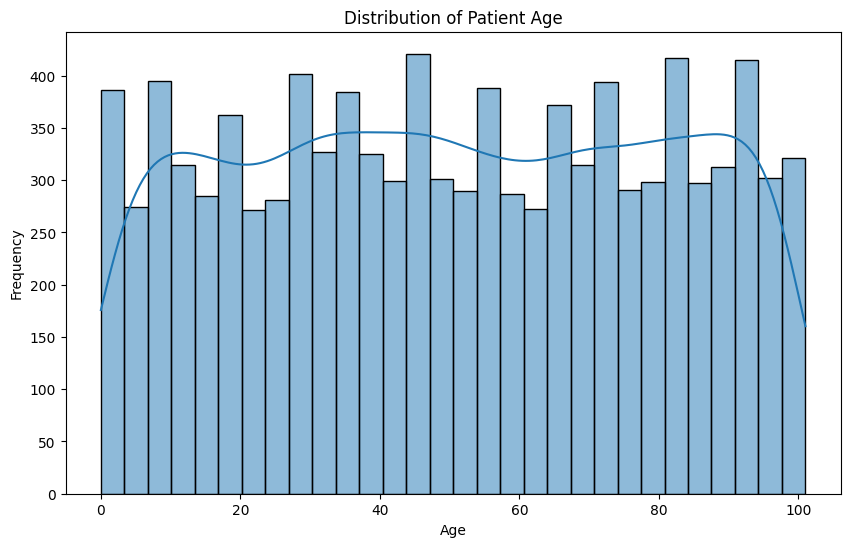

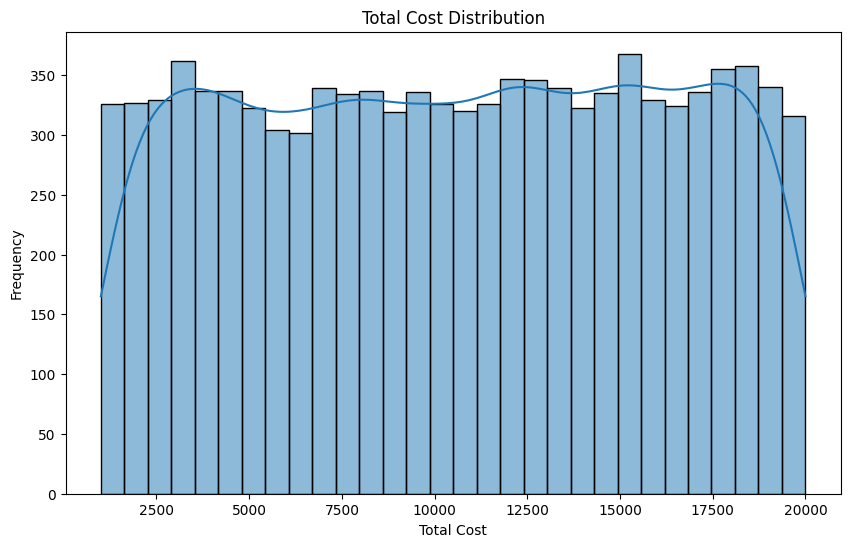

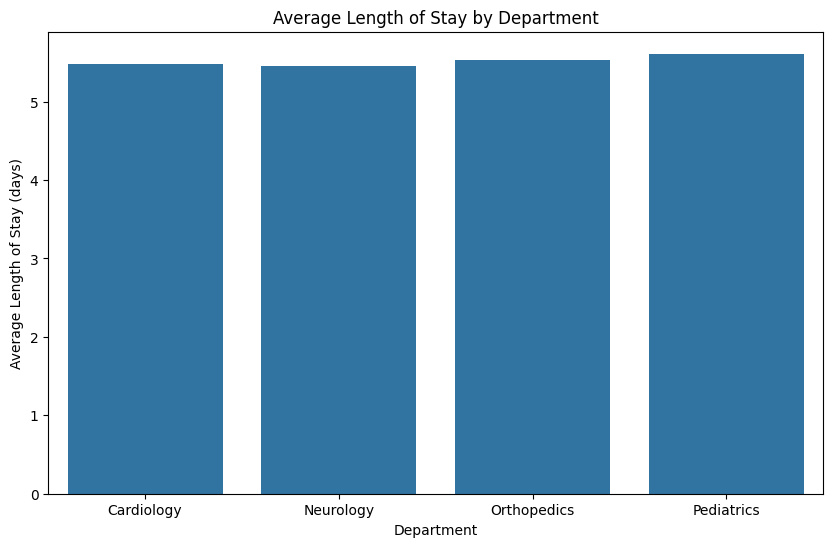

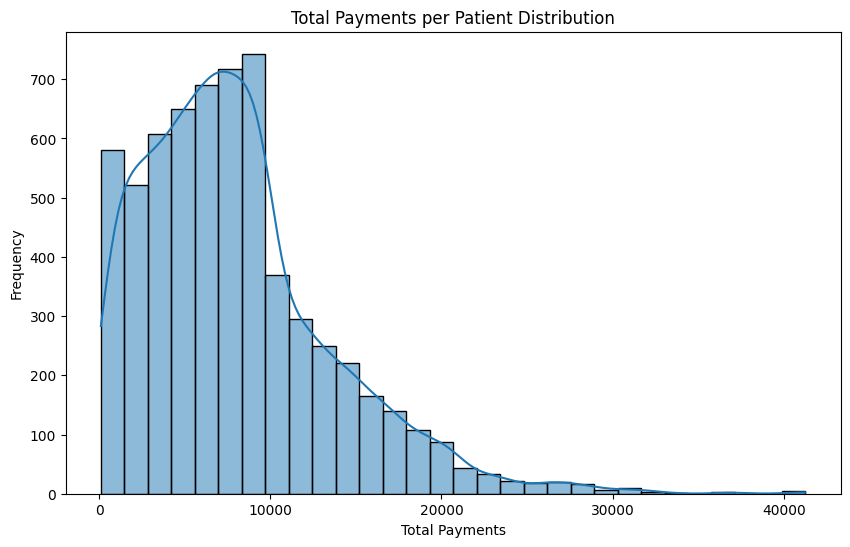

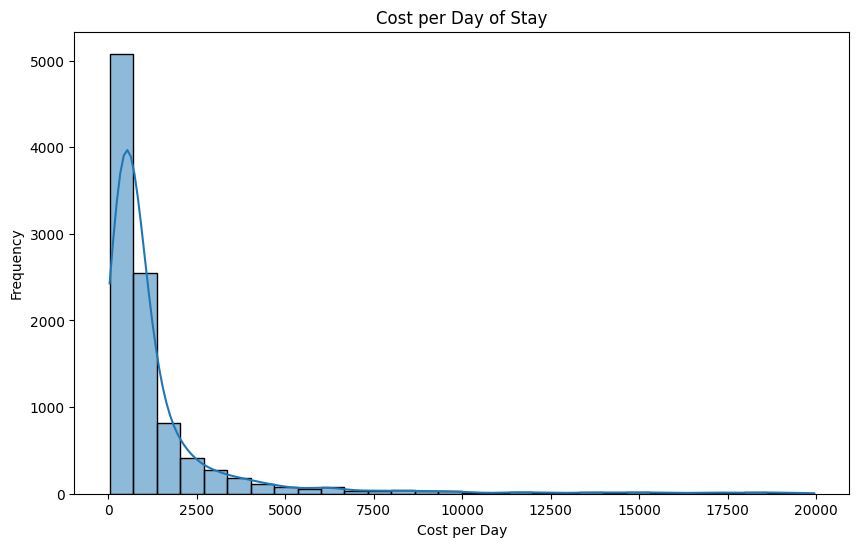

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transformed datasets
dim_patients = pd.read_csv('transformed_dim_patients.csv')
dim_encounters = pd.read_csv('transformed_dim_encounters.csv')
fact_patient_care = pd.read_csv('transformed_fact_patient_care.csv')

# Ensure length_of_stay exists in dim_encounters
if 'length_of_stay' not in dim_encounters.columns:
    dim_encounters['length_of_stay'] = (pd.to_datetime(dim_encounters['discharge_date']) - pd.to_datetime(dim_encounters['admission_date'])).dt.days

# Ensure department column exists, or use another relevant column
if 'department' not in dim_encounters.columns:
    dim_encounters['department'] = 'General'  # Placeholder if no department info

# Visualization 1: Distribution of Patient Age
plt.figure(figsize=(10, 6))
sns.histplot(dim_patients['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Total Cost Distribution
plt.figure(figsize=(10, 6))
sns.histplot(fact_patient_care['total_cost'], bins=30, kde=True)
plt.title('Total Cost Distribution')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Average Length of Stay by Department
avg_length_of_stay_by_department = dim_encounters.groupby('department')['length_of_stay'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_length_of_stay_by_department, x='department', y='length_of_stay')
plt.title('Average Length of Stay by Department')
plt.xlabel('Department')
plt.ylabel('Average Length of Stay (days)')
plt.show()

# Visualization 4: Total Payments per Patient Distribution
plt.figure(figsize=(10, 6))
sns.histplot(fact_patient_care['total_payments'].dropna(), bins=30, kde=True)
plt.title('Total Payments per Patient Distribution')
plt.xlabel('Total Payments')
plt.ylabel('Frequency')
plt.show()

# Visualization 5: Cost per Day of Stay
plt.figure(figsize=(10, 6))
sns.histplot(fact_patient_care['cost_per_day'].dropna(), bins=30, kde=True)
plt.title('Cost per Day of Stay')
plt.xlabel('Cost per Day')
plt.ylabel('Frequency')
plt.show()


In [31]:
import pandas as pd
import sqlite3

# Load the datasets
dim_patients = pd.read_csv('transformed_dim_patients.csv')
dim_encounters = pd.read_csv('transformed_dim_encounters.csv')
dim_clinical_data = pd.read_csv('transformed_dim_clinical_data.csv')
dim_treatments = pd.read_csv('transformed_dim_treatments.csv')
dim_financials = pd.read_csv('transformed_dim_financials.csv')
dim_operations = pd.read_csv('transformed_dim_operations.csv')
fact_patient_care = pd.read_csv('transformed_fact_patient_care.csv')

# Create a connection to the SQLite database
conn = sqlite3.connect('healthcare_warehouse.db')

# Define a function to create tables in the SQLite database
def create_tables():
    with conn:
        conn.execute('''
        CREATE TABLE IF NOT EXISTS dim_patients (
            patient_id INTEGER PRIMARY KEY,
            name TEXT,
            dob DATE,
            gender TEXT,
            address TEXT,
            contact_info TEXT,
            insurance_info TEXT,
            age INTEGER
        );
        ''')

        conn.execute('''
        CREATE TABLE IF NOT EXISTS dim_encounters (
            encounter_id INTEGER PRIMARY KEY,
            patient_id INTEGER,
            admission_date DATE,
            discharge_date DATE,
            department TEXT,
            primary_diagnosis TEXT,
            secondary_diagnoses TEXT,
            procedures_performed TEXT,
            FOREIGN KEY (patient_id) REFERENCES dim_patients(patient_id)
        );
        ''')

        conn.execute('''
        CREATE TABLE IF NOT EXISTS dim_clinical_data (
            clinical_data_id INTEGER PRIMARY KEY,
            patient_id INTEGER,
            medical_history TEXT,
            current_medications TEXT,
            lab_results TEXT,
            imaging_reports TEXT,
            vital_signs TEXT,
            history_part1 TEXT,
            history_part2 TEXT,
            FOREIGN KEY (patient_id) REFERENCES dim_patients(patient_id)
        );
        ''')

        conn.execute('''
        CREATE TABLE IF NOT EXISTS dim_treatments (
            treatment_id INTEGER PRIMARY KEY,
            encounter_id INTEGER,
            treatment_plans TEXT,
            surgical_procedures TEXT,
            medication_administration TEXT,
            follow_up_care TEXT,
            FOREIGN KEY (encounter_id) REFERENCES dim_encounters(encounter_id)
        );
        ''')

        conn.execute('''
        CREATE TABLE IF NOT EXISTS dim_financials (
            financial_id INTEGER PRIMARY KEY,
            patient_id INTEGER,
            billing_info TEXT,
            payments REAL,
            outstanding_balances REAL,
            FOREIGN KEY (patient_id) REFERENCES dim_patients(patient_id)
        );
        ''')

        conn.execute('''
        CREATE TABLE IF NOT EXISTS dim_operations (
            operation_id INTEGER PRIMARY KEY,
            staff_id INTEGER,
            resource_utilization TEXT,
            patient_satisfaction TEXT
        );
        ''')

        conn.execute('''
        CREATE TABLE IF NOT EXISTS fact_patient_care (
            fact_id INTEGER PRIMARY KEY,
            patient_id INTEGER,
            encounter_id INTEGER,
            clinical_data_id INTEGER,
            treatment_id INTEGER,
            financial_id INTEGER,
            operation_id INTEGER,
            total_cost REAL,
            length_of_stay INTEGER,
            cost_per_day REAL,
            FOREIGN KEY (patient_id) REFERENCES dim_patients(patient_id),
            FOREIGN KEY (encounter_id) REFERENCES dim_encounters(encounter_id),
            FOREIGN KEY (clinical_data_id) REFERENCES dim_clinical_data(clinical_data_id),
            FOREIGN KEY (treatment_id) REFERENCES dim_treatments(treatment_id),
            FOREIGN KEY (financial_id) REFERENCES dim_financials(financial_id),
            FOREIGN KEY (operation_id) REFERENCES dim_operations(operation_id)
        );
        ''')

create_tables()

# Define a function to insert data into the tables
def insert_data():
    with conn:
        dim_patients.to_sql('dim_patients', conn, if_exists='replace', index=False)
        dim_encounters.to_sql('dim_encounters', conn, if_exists='replace', index=False)
        dim_clinical_data.to_sql('dim_clinical_data', conn, if_exists='replace', index=False)
        dim_treatments.to_sql('dim_treatments', conn, if_exists='replace', index=False)
        dim_financials.to_sql('dim_financials', conn, if_exists='replace', index=False)
        dim_operations.to_sql('dim_operations', conn, if_exists='replace', index=False)
        fact_patient_care.to_sql('fact_patient_care', conn, if_exists='replace', index=False)

insert_data()

print("Data has been successfully loaded into the SQLite database.")


Data has been successfully loaded into the SQLite database.


In [32]:
import pandas as pd

# Check if CSV files are correctly loaded
print(pd.read_csv('transformed_dim_patients.csv').head())
print(pd.read_csv('transformed_dim_encounters.csv').head())
print(pd.read_csv('transformed_dim_clinical_data.csv').head())
print(pd.read_csv('transformed_dim_treatments.csv').head())
print(pd.read_csv('transformed_dim_financials.csv').head())
print(pd.read_csv('transformed_dim_operations.csv').head())
print(pd.read_csv('transformed_fact_patient_care.csv').head())


   patient_id               name         dob gender                  address  \
0           1  Dustin Mclaughlin  1935-10-23   Male        24549 Powell Lane   
1           2          Tina Cole  1979-08-06   Male       794 Collins Courts   
2           3    Erin Montgomery  1955-06-11   Male       88800 Andrews Dale   
3           4        Brian Lewis  1938-02-28   Male       9371 Ferguson Land   
4           5       Jill Gregory  1964-07-02   Male  22592 Richardson Spring   

             contact_info                       insurance_info  age  
0           (954)280-3358               Franklin Group 51-7665   88  
1           (437)422-0582       Grant, Craig and Singh 64-4542   44  
2  001-403-922-7578x65557  Foster, Jackson and Hammond 63-7067   69  
3    001-433-612-7064x185                Johnson-Lopez 02-8507   86  
4            240-466-2110                  Dickson PLC 07-0066   60  
   encounter_id  patient_id admission_date discharge_date   department  \
0             1        86